refer:
object recognition

This program is inspired by the work of 
g-sari and the original program can be found at https://github.com/g-sari/pyautodigits/

imshow: https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/

findContours: https://zhuanlan.zhihu.com/p/38739563
https://docs.opencv.org/3.1.0/d9/d8b/tutorial_py_contours_hierarchy.html

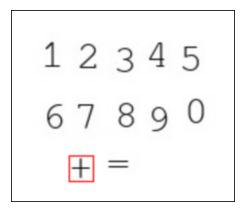

Enter the value of the red rectangle (type 'quit' to stop:) +


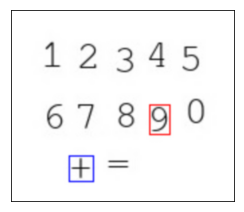

Enter the value of the red rectangle (type 'quit' to stop:) 9


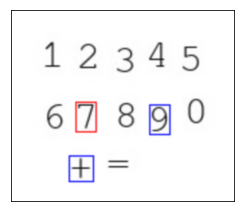

Enter the value of the red rectangle (type 'quit' to stop:) quit
No. of objects:  64
training complete


In [4]:
import sys
import cv2
import numpy as np

import copy
import time

from matplotlib import pyplot as plt

def save_data(samples, responses):
    """Method to save trained data"""
    responses = np.array(responses, np.float32)
    responses = responses.reshape((responses.size, 1))
    np.savetxt('ocr_training.data', samples)
    np.savetxt('ocr_responses.data', responses)
    

pic_name="ocr_insurance_card_train_2.jpg"
contour_dimension_from_h=14
contour_dimension_to_h=23
sizeOfFig = 4

#im = cv2.imread("ocr_insurance_card_train_1.png")
im = cv2.imread("TrainingImg.jpeg")
gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 1)

# _ is to fill up the first variable as it's not going to be used.
_, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

samples = np.empty((0, 100))
# responses = inputs from user
responses = []

# change the size of figure (picture) with width=6 and height to corresponding ratio.
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = sizeOfFig
fig_size[1] = fig_size[1]* sizeOfFig/fig_size[0]
plt.rcParams["figure.figsize"] = fig_size

for cnt in contours:
    #The following filter out those contours which are too small.
    if cv2.contourArea(cnt) > (contour_dimension_to_h * 2):
        # return the dimension of filtered contours
        [x, y, w, h] = cv2.boundingRect(cnt)        

        if h > contour_dimension_from_h and h < contour_dimension_to_h:                        
            # This following will draw a blue rectangle of found objects.    
            # The size of the rectangles are slightly larger than the object.
            cv2.rectangle(im, (x - 1, y - 1), (x + 1 + w, y + 1 + h), (255, 0, 0), 1)
            
            #roi: region of interest
            roi = thresh[y:y + h, x:x + w]
            roismall = cv2.resize(roi, (10, 10))                        
            
            plt.imshow(im, cmap = 'gray', interpolation = 'bicubic')
            plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
            plt.show()           
            
            strUserInput = input("Enter the value of the red rectangle (type 'quit' to stop:) ")
            
            if strUserInput == "quit":
                break
            elif len(strUserInput)!=1: 
                print("You should enter a character")
                break
            else:
                # change the color of rectangle whose value has just been input by user to blue
                cv2.rectangle(im, (x - 1, y - 1), (x + 1 + w, y + 1 + h), (0, 0, 255), 1)
                # stop for a while as it takes time to draw.
                time.sleep(0.5)
                responses.append(int(ord(strUserInput)))
                sample = roismall.reshape((1, 100))
                samples = np.append(samples, sample, 0)

print('No. of objects: ', len(contours))
save_data(samples, responses)
print ("training complete")

